In [99]:
# Import library for exploring dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df1 = pd.read_csv("/content/forest_fires(1).csv")
df2 = pd.read_csv("/content/forest_fires(2).csv")



In [101]:
df1.head()

,id,X,Y,month,day,FFMC,DMC
0,1,7,5,mar,fri,86.2,26.2
1,2,7,4,oct,tue,90.6,NaN
2,3,7,4,oct,sat,90.6,43.7
3,4,8,6,mar,fri,91.7,33.3
4,5,8,6,mar,?,89.3,51.3


In [102]:
df2.head()

,id,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,NaN,0.0,0.0
1,2,7,4,oct,tue,90.6,NaN,669.1,6.7,18.0,33,NaN,0.0,0.0
2,3,7,4,oct,sat,90.6,43.7,686.9,6.7,NaN,33,1.3,0.0,0.0
3,4,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,5,8,6,mar,?,89.3,51.3,102.2,9.6,NaN,99,NaN,0.0,0.0


In [103]:
common_column = 'id','X','Y','month','day','FFMC','DMC'

# Merge the two datasets on a common column
df = pd.merge(df1, df2, on=common_column)
df.replace(['?', '/', '#'], np.nan, inplace=True)

# Print the merged dataset
print(df)

      id  X  Y month  day  FFMC   DMC     DC   ISI  temp  RH  wind  rain  \
0      1  7  5   mar  fri  86.2  26.2   94.3   5.1   8.2  51   NaN   0.0   
1      2  7  4   oct  tue  90.6   NaN  669.1   6.7  18.0  33   NaN   0.0   
2      3  7  4   oct  sat  90.6  43.7  686.9   6.7   NaN  33   1.3   0.0   
3      4  8  6   mar  fri  91.7  33.3   77.5   9.0   8.3  97   4.0   0.2   
4      5  8  6   mar  NaN  89.3  51.3  102.2   9.6   NaN  99   NaN   0.0   
..   ... .. ..   ...  ...   ...   ...    ...   ...   ...  ..   ...   ...   
512  513  4  3   aug  NaN  81.6   NaN  665.6   1.9  27.8  32   2.7   0.0   
513  514  2  4   aug  sun  81.6  56.7  665.6   1.9  21.9  71   5.8   0.0   
514  515  7  4   aug  NaN  81.6  56.7  665.6   1.9  21.2  70   6.7   0.0   
515  516  1  4   aug  NaN  94.4   NaN  614.7  11.3  25.6  42   NaN   0.0   
516  517  6  3   nov  NaN  79.5   NaN  106.7   1.1  11.8  31   4.5   0.0   

      area  
0     0.00  
1     0.00  
2     0.00  
3     0.00  
4     0.00  
..     ..

In [104]:
df.shape

(517, 14)

In [105]:
df.columns

Index(['id', 'X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp',
       'RH', 'wind', 'rain', 'area'],
      dtype='object')

In [106]:
df.describe()

,id,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,387.000000,517.000000,517.000000,417.000000,517.000000,308.000000,517.000000,517.000000
mean,259.000000,4.669246,4.299807,90.644681,110.722997,547.940039,9.021663,18.936211,44.288201,3.995130,0.021663,12.847292
std,149.389312,2.313778,1.229900,5.520111,64.253808,248.066192,4.559477,5.931578,16.317469,1.707888,0.295959,63.655818
min,1.000000,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.900000,0.000000,0.000000
25%,130.000000,3.000000,4.000000,90.200000,69.150000,437.700000,6.500000,15.700000,33.000000,2.700000,0.000000,0.000000
50%,259.000000,4.000000,4.000000,91.600000,108.000000,664.200000,8.400000,19.400000,42.000000,4.000000,0.000000,0.520000
75%,388.000000,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,23.000000,53.000000,4.900000,0.000000,6.570000
max,517.000000,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [107]:
df.isnull().sum()

id         0
X          0
Y          0
month      0
day      200
FFMC       0
DMC      130
DC         0
ISI        0
temp     100
RH         0
wind     209
rain       0
area       0
dtype: int64

In [108]:
df['day'].value_counts()

sun    58
sat    56
fri    54
mon    46
thu    40
wed    32
tue    31
Name: day, dtype: int64

In [109]:
# Calculate the mode
mode_val = df['day'].mode()[0]

# Fill the null values
df['day'].fillna(mode_val, inplace=True)

In [110]:
df['DMC'].value_counts()

99.0     7
35.8     7
231.1    6
142.4    6
117.9    6
        ..
127.1    1
90.4     1
53.3     1
32.8     1
26.2     1
Name: DMC, Length: 187, dtype: int64

In [111]:
# Calculate the mode
median_val = df['DMC'].median()

# Fill the null values
df['DMC'].fillna(median_val, inplace=True)

In [112]:
df['temp'].value_counts()

17.4    7
20.6    7
19.1    6
4.6     6
23.4    6
       ..
28.6    1
29.6    1
13.2    1
27.4    1
25.6    1
Name: temp, Length: 172, dtype: int64

In [113]:
# Calculate the mode
median_val = df['temp'].median()

# Fill the null values
df['temp'].fillna(median_val, inplace=True)

In [114]:
df['wind'].value_counts()

2.2    38
4.0    33
4.9    31
3.1    28
5.4    26
3.6    26
2.7    25
4.5    24
1.8    15
6.3    14
5.8    11
1.3    10
7.6     9
0.9     5
6.7     4
8.0     3
8.5     3
8.9     1
7.2     1
9.4     1
Name: wind, dtype: int64

In [115]:
# Calculate the mode
median_val = df['wind'].median()

# Fill the null values
df['wind'].fillna(median_val, inplace=True)

In [116]:
df.isnull().any()

id       False
X        False
Y        False
month    False
day      False
FFMC     False
DMC      False
DC       False
ISI      False
temp     False
RH       False
wind     False
rain     False
area     False
dtype: bool

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      517 non-null    int64  
 1   X       517 non-null    int64  
 2   Y       517 non-null    int64  
 3   month   517 non-null    object 
 4   day     517 non-null    object 
 5   FFMC    517 non-null    float64
 6   DMC     517 non-null    float64
 7   DC      517 non-null    float64
 8   ISI     517 non-null    float64
 9   temp    517 non-null    float64
 10  RH      517 non-null    int64  
 11  wind    517 non-null    float64
 12  rain    517 non-null    float64
 13  area    517 non-null    float64
dtypes: float64(8), int64(4), object(2)
memory usage: 60.6+ KB


In [118]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualisizing the numerical variables
df[numerical_features].head()

Number of numerical variables:  12


,id,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1,7,5,86.2,26.2,94.3,5.1,8.2,51,4.0,0.0,0.0
1,2,7,4,90.6,108.0,669.1,6.7,18.0,33,4.0,0.0,0.0
2,3,7,4,90.6,43.7,686.9,6.7,19.4,33,1.3,0.0,0.0
3,4,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,5,8,6,89.3,51.3,102.2,9.6,19.4,99,4.0,0.0,0.0


In [119]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

discrete_feature

Discrete Variables Count: 4


['X', 'Y', 'wind', 'rain']

In [120]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

continuous_feature

Continuous feature Count 8


['id', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'area']

In [121]:
df.describe()

,id,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,259.000000,4.669246,4.299807,90.644681,110.038298,547.940039,9.021663,19.025919,44.288201,3.997099,0.021663,12.847292
std,149.389312,2.313778,1.229900,5.520111,55.586070,248.066192,4.559477,5.329044,16.317469,1.317360,0.295959,63.655818
min,1.000000,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.900000,0.000000,0.000000
25%,130.000000,3.000000,4.000000,90.200000,88.200000,437.700000,6.500000,16.800000,33.000000,3.600000,0.000000,0.000000
50%,259.000000,4.000000,4.000000,91.600000,108.000000,664.200000,8.400000,19.400000,42.000000,4.000000,0.000000,0.520000
75%,388.000000,7.000000,5.000000,92.900000,130.300000,713.900000,10.800000,21.900000,53.000000,4.000000,0.000000,6.570000
max,517.000000,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [122]:
# describe categorical features

df.describe(include="O")

,month,day
count,517,517
unique,12,7
top,aug,sun
freq,184,258


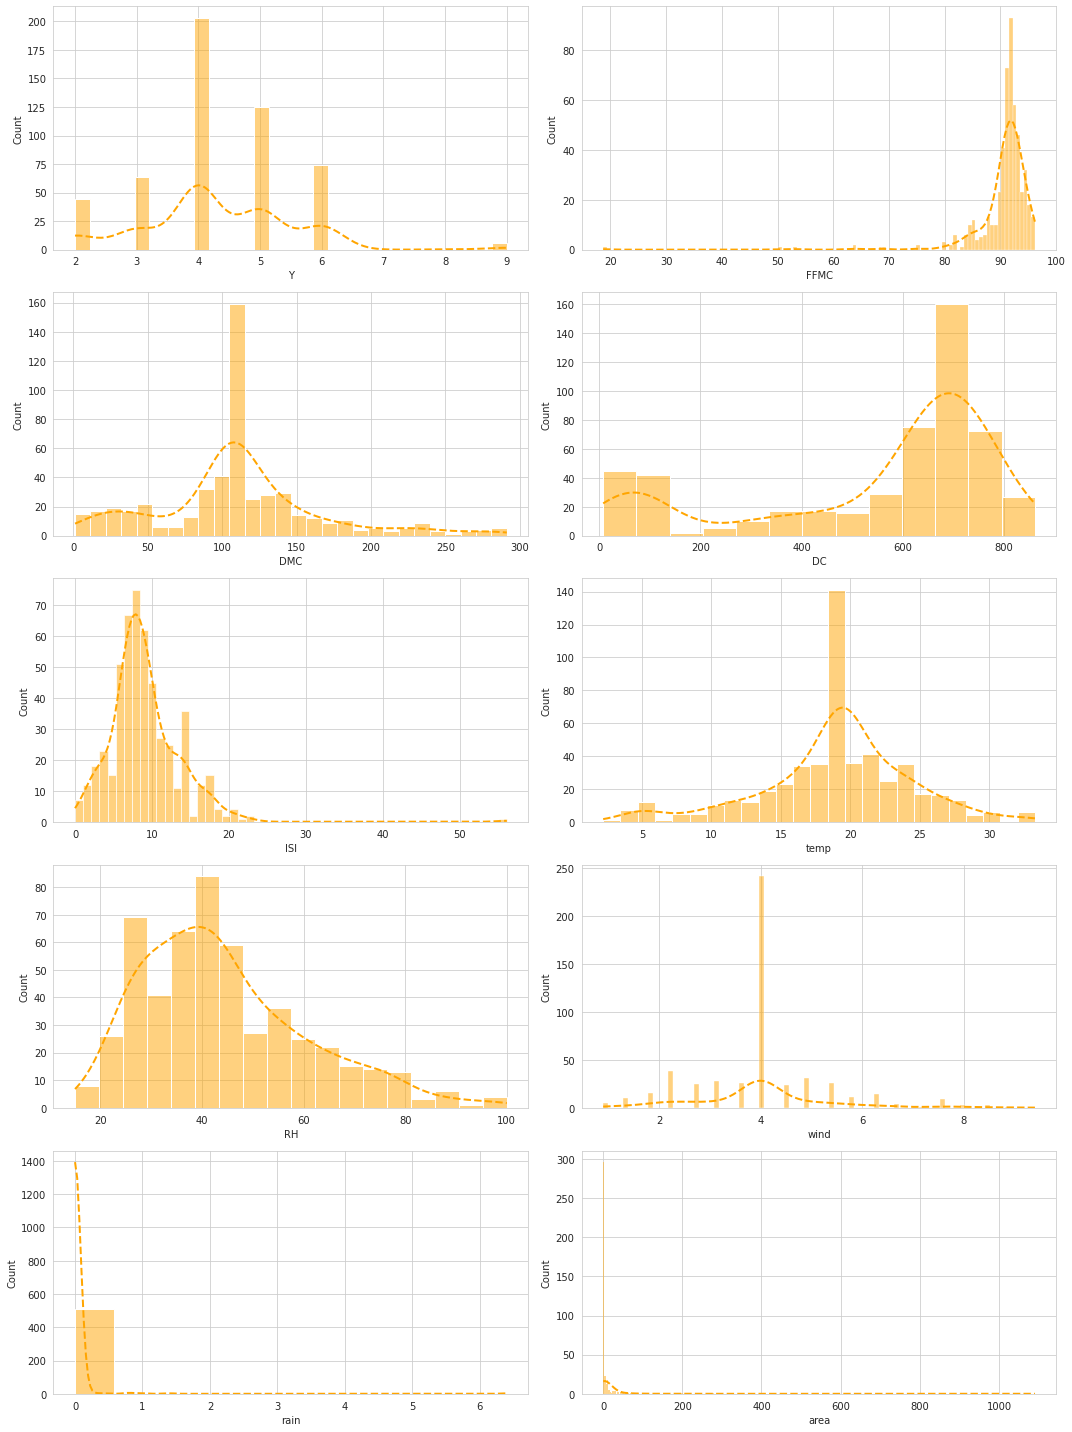

In [123]:

num_cols = df.select_dtypes(include='number').columns

fig, axs =  plt.subplots(nrows=5, ncols=2, figsize=(15,20))
axs = np.ravel(axs)

for i, col in enumerate(num_cols[2:]):
    plt.sca(axs[i])
    sns.histplot(data=df, x=col, kde=True, line_kws={'linewidth':2, 'linestyle':'--'}, color='orange')
    
plt.tight_layout()
plt.show()

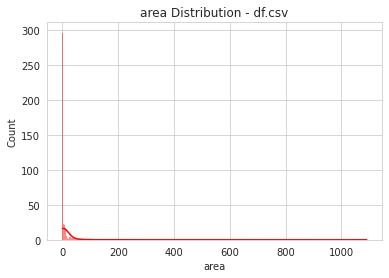

In [124]:
# Distribution of target feature
sns.histplot(df['area'], kde=True, color='red')
plt.title("area Distribution - df.csv")
plt.xlabel("area")
plt.ylabel("Count")
plt.show()

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      517 non-null    int64  
 1   X       517 non-null    int64  
 2   Y       517 non-null    int64  
 3   month   517 non-null    object 
 4   day     517 non-null    object 
 5   FFMC    517 non-null    float64
 6   DMC     517 non-null    float64
 7   DC      517 non-null    float64
 8   ISI     517 non-null    float64
 9   temp    517 non-null    float64
 10  RH      517 non-null    int64  
 11  wind    517 non-null    float64
 12  rain    517 non-null    float64
 13  area    517 non-null    float64
dtypes: float64(8), int64(4), object(2)
memory usage: 76.8+ KB


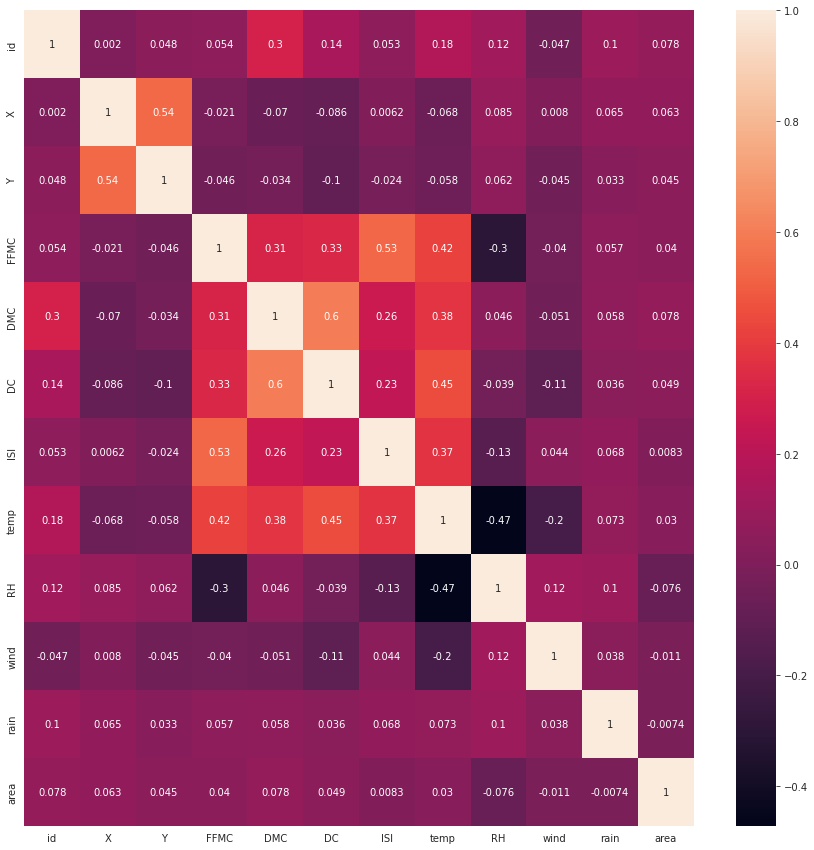

In [126]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True);

In [127]:
df.corr() # the correlation between the columns

,id,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
id,1.000000,0.002007,0.048288,0.054135,0.300741,0.142278,0.052542,0.177994,0.116645,-0.047372,0.101648,0.077550
X,0.002007,1.000000,0.539548,-0.021039,-0.069574,-0.085916,0.006210,-0.067972,0.085223,0.008014,0.065387,0.063385
Y,0.048288,0.539548,1.000000,-0.046308,-0.033956,-0.101178,-0.024488,-0.057516,0.062221,-0.045274,0.033234,0.044873
FFMC,0.054135,-0.021039,-0.046308,1.000000,0.310259,0.330512,0.531805,0.420024,-0.300995,-0.039677,0.056702,0.040122
DMC,0.300741,-0.069574,-0.033956,0.310259,1.000000,0.602905,0.260754,0.375960,0.046485,-0.050538,0.057552,0.078204
DC,0.142278,-0.085916,-0.101178,0.330512,0.602905,1.000000,0.229154,0.451388,-0.039192,-0.110354,0.035861,0.049383
ISI,0.052542,0.006210,-0.024488,0.531805,0.260754,0.229154,1.000000,0.368080,-0.132517,0.043884,0.067668,0.008258
temp,0.177994,-0.067972,-0.057516,0.420024,0.375960,0.451388,0.368080,1.000000,-0.471475,-0.198832,0.072583,0.030318
RH,0.116645,0.085223,0.062221,-0.300995,0.046485,-0.039192,-0.132517,-0.471475,1.000000,0.117007,0.099751,-0.075519
wind,-0.047372,0.008014,-0.045274,-0.039677,-0.050538,-0.110354,0.043884,-0.198832,0.117007,1.000000,0.037740,-0.011479


In [128]:
df.month.value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [129]:
df.day.value_counts()

sun    258
sat     56
fri     54
mon     46
thu     40
wed     32
tue     31
Name: day, dtype: int64

In [130]:
## Data mapping of categorical features

month_map = {'jan':1, 'feb':2, 'mar':3, 
             'apr':4, 'may':5, 'jun':6, 
             'jul':7, 'aug':8, 'sep':9, 
             'oct':10, 'nov':11, 'dec':12}

day_map = {'mon':1, 'tue':2, 'wed':3,
          'thu':4, 'fri':5, 'sat':6, 'sun':7}

df.month = df.month.map(month_map)
df.day = df.day.map(day_map)

In [131]:
df.head()

,id,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,4.0,0.0,0.0
1,2,7,4,10,2,90.6,108.0,669.1,6.7,18.0,33,4.0,0.0,0.0
2,3,7,4,10,6,90.6,43.7,686.9,6.7,19.4,33,1.3,0.0,0.0
3,4,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,5,8,6,3,7,89.3,51.3,102.2,9.6,19.4,99,4.0,0.0,0.0


In [132]:
df.isnull().sum()

id       0
X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

<AxesSubplot:xlabel='day', ylabel='count'>

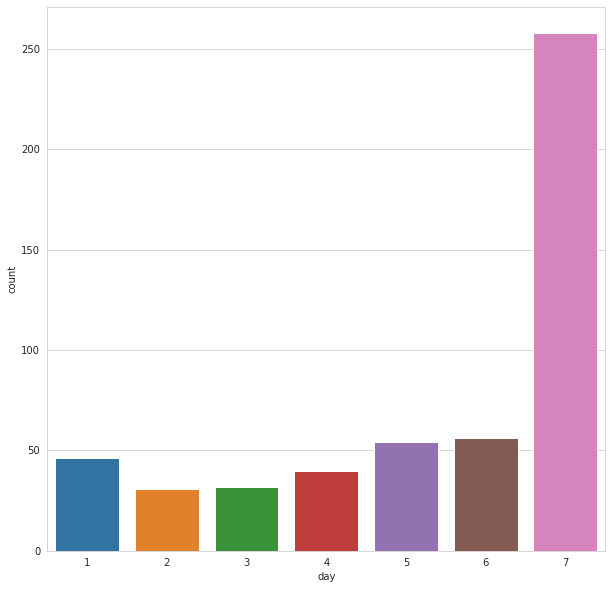

In [133]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.set_style('whitegrid')
sns.countplot(x='day',data=df,ax=ax)

<AxesSubplot:xlabel='month', ylabel='count'>

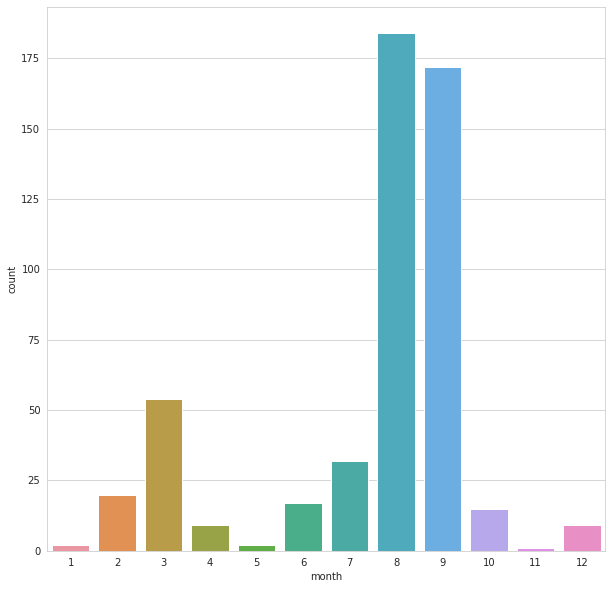

In [134]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.set_style('whitegrid')
sns.countplot(x='month',data=df,ax=ax)

In [135]:
df = df.drop('id', axis=1)

<AxesSubplot:xlabel='wind', ylabel='count'>

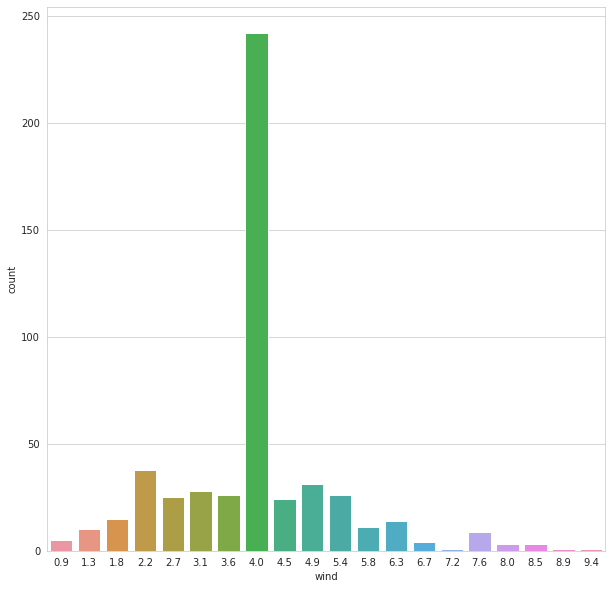

In [136]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.set_style('whitegrid')
sns.countplot(x='wind',data=df,ax=ax)

<AxesSubplot:xlabel='FFMC', ylabel='count'>

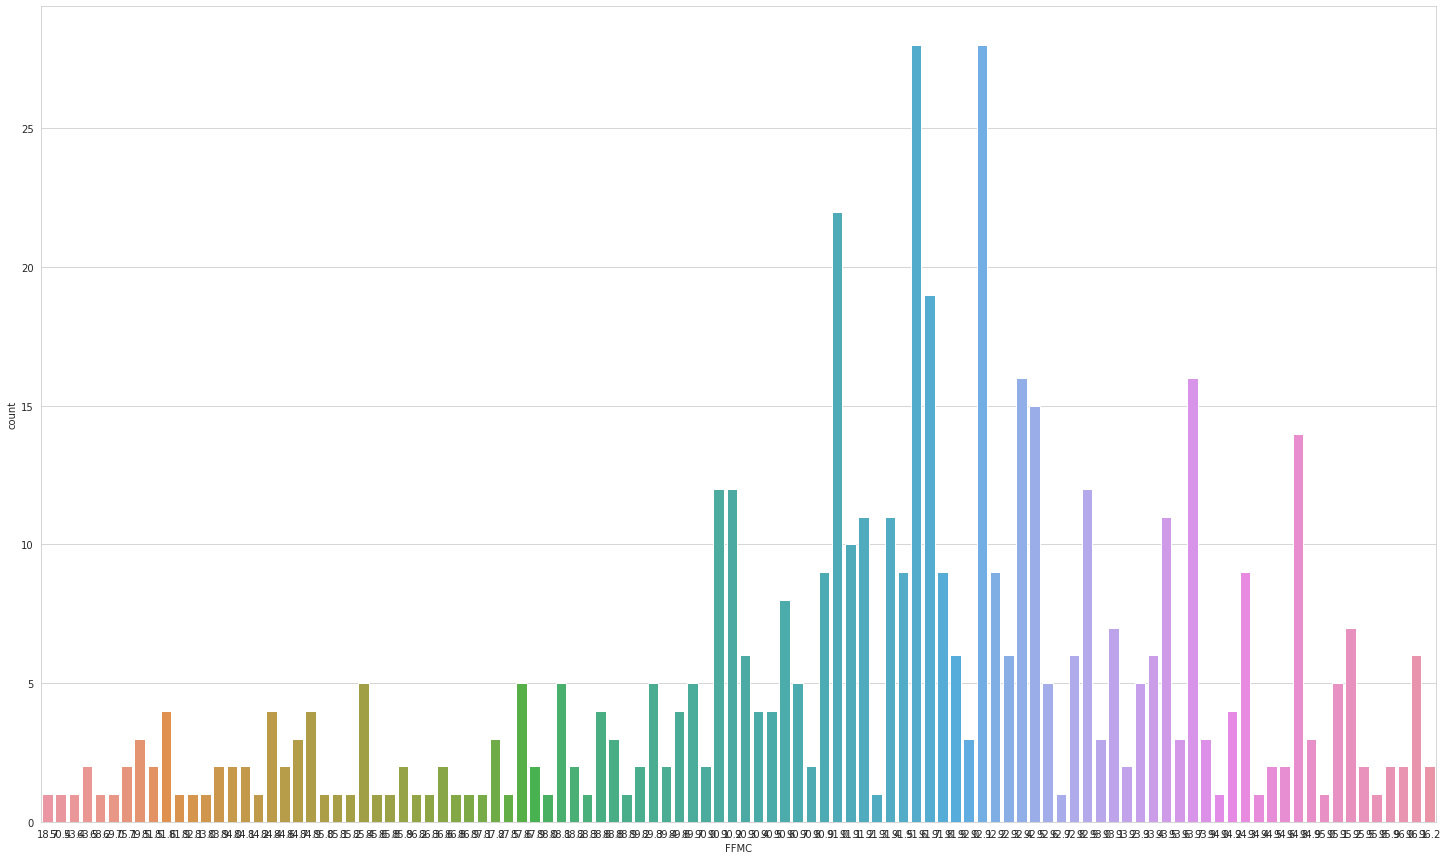

In [137]:
fig, ax = plt.subplots(figsize=(25, 15))
sns.set_style('whitegrid')
sns.countplot(x='FFMC',data=df,ax=ax)

<AxesSubplot:xlabel='rain', ylabel='count'>

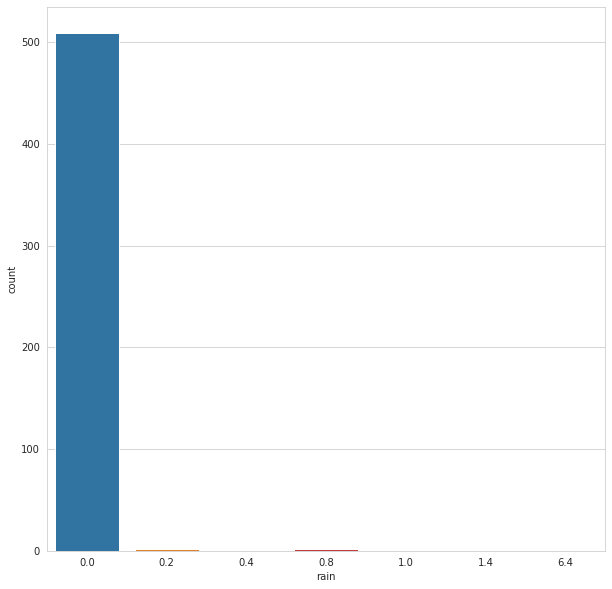

In [138]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.set_style('whitegrid')
sns.countplot(x='rain',data=df,ax=ax)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


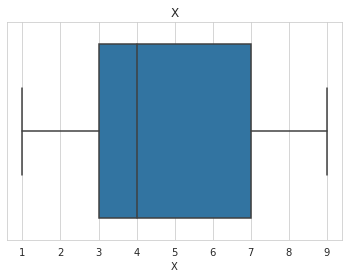

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


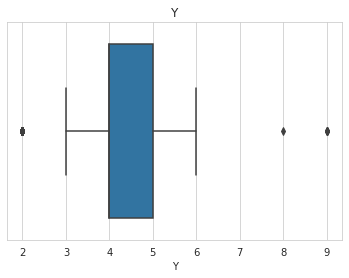

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


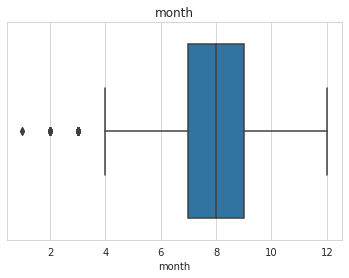

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


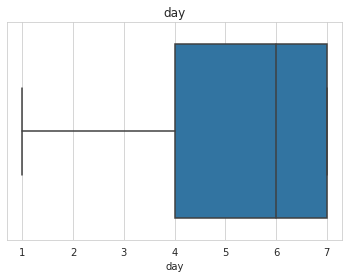

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


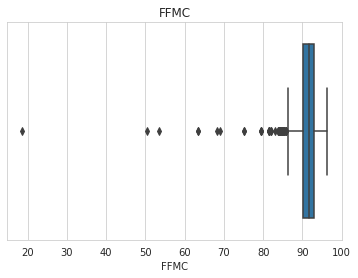

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


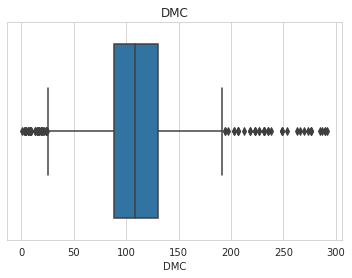

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


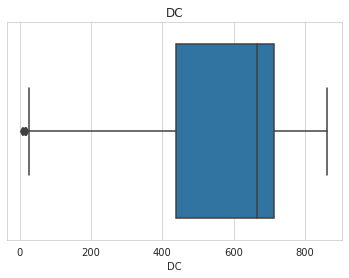

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


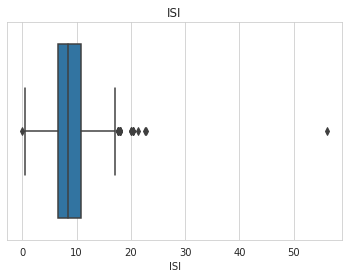

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


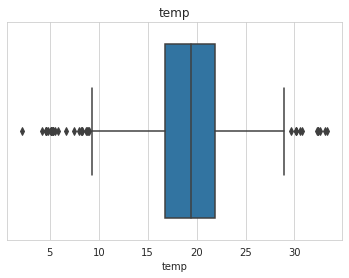

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


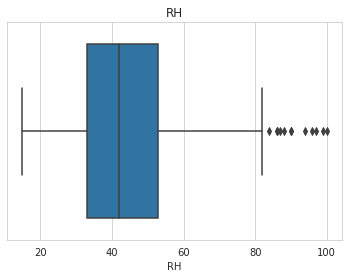

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


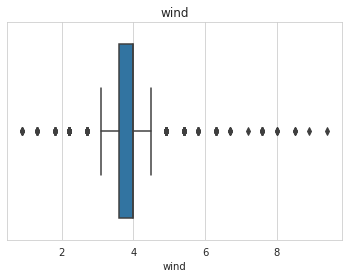

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


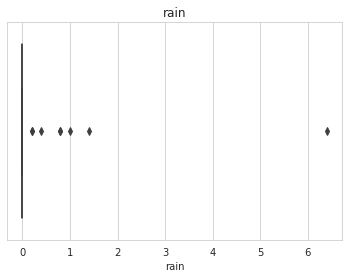

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


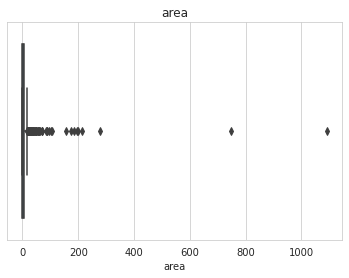

In [139]:
# Boxplots of each feature
for feature in df.columns:
  sns.boxplot(df[feature])
  plt.title(feature)
  plt.show()
  

In [140]:

# Identify the columns with potential outliers
outlier_cols = [ 'month', 'FFMC', 'DMC', 'DC', 'ISI', 'temp',
       'RH', 'wind', 'rain','area']

# Replace outliers with the upper and lower bounds
for col in outlier_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


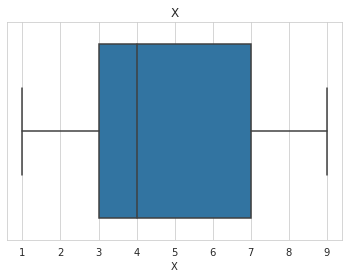

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


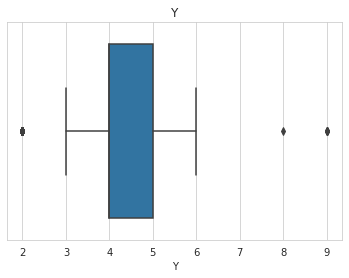

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


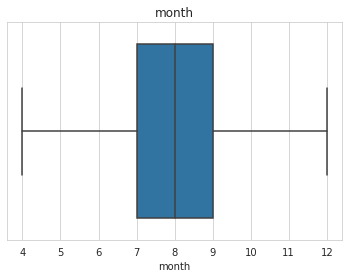

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


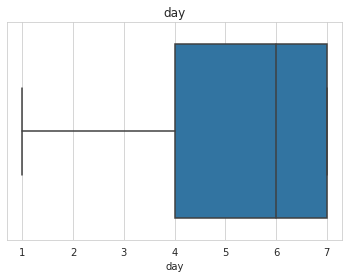

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


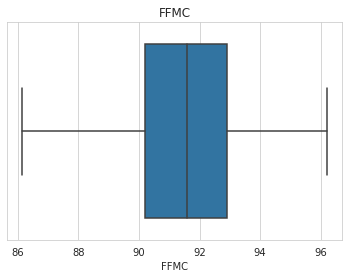

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


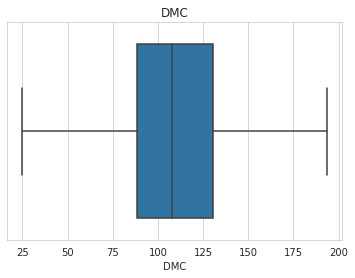

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


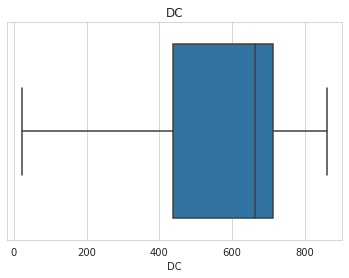

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


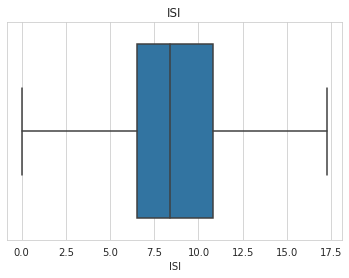

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


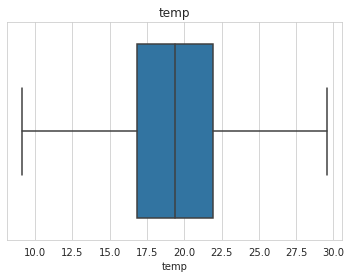

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


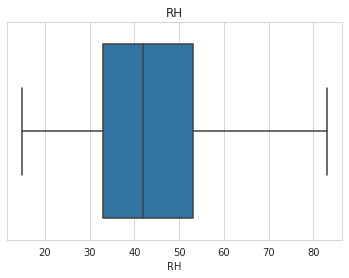

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


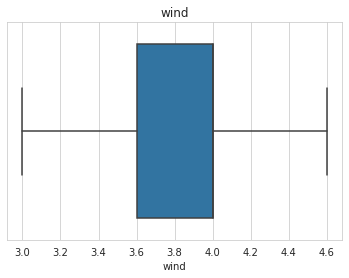

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


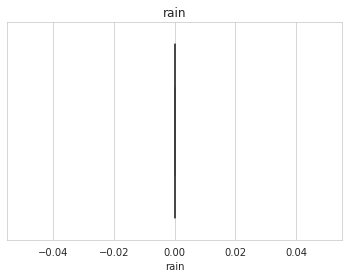

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


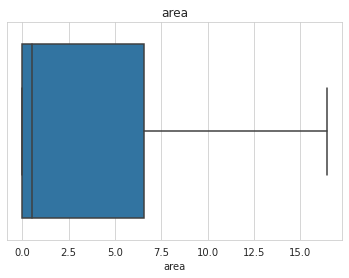

In [141]:
# Boxplots of each feature
for feature in df.columns:
  sns.boxplot(df[feature])
  plt.title(feature)
  plt.show()

In [142]:
# Scale the numerical features using min-max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']] = scaler.fit_transform(df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']])

X = df.drop('area', 1).values
y = df['area'].values

<ipython-input-142-5962a726cd1c>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('area', 1).values


In [143]:
import random

def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state:
        random.seed(random_state)
    
    n = len(X)
    test_data = set(random.sample(range(n), int(n * test_size)))
    train_data = set(range(n)) - test_data
    X_train = [X[i] for i in train_data]
    X_train=np.array(X_train)
    X_test = [X[i] for i in test_data]
    X_test=np.array(X_test)
    y_train = [y[i] for i in train_data]
    y_train=np.array(y_train)
    y_test = [y[i] for i in test_data]
    y_test=np.array(y_test)
    return X_train, X_test, y_train, y_test
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=41)

In [144]:
import numpy as np

class DecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def mean_squared_error(self, y):
        return np.mean((y - np.mean(y)) ** 2)

    def split_data(self, X, y, feature_idx, threshold):
        left_mask = X[:, feature_idx] <= threshold
        right_mask = X[:, feature_idx] > threshold
        X_left, y_left = X[left_mask], y[left_mask]
        X_right, y_right = X[right_mask], y[right_mask]
        return X_left, y_left, X_right, y_right

    def find_best_split(self, X, y):
        best_feature_idx, best_threshold, best_mse = None, None, np.inf
        for feature_idx in range(X.shape[1]):
            for threshold in np.unique(X[:, feature_idx]):
                X_left, y_left, X_right, y_right = self.split_data(X, y, feature_idx, threshold)
                if len(y_left) < self.min_samples_split or len(y_right) < self.min_samples_split:
                    continue
                mse_left, mse_right = self.mean_squared_error(y_left), self.mean_squared_error(y_right)
                mse = mse_left + mse_right
                if mse < best_mse:
                    best_feature_idx, best_threshold, best_mse = feature_idx, threshold, mse
        return best_feature_idx, best_threshold, best_mse

    def build_tree(self, X, y, depth):
        if depth == self.max_depth or len(y) < self.min_samples_split:
            return np.mean(y)
        feature_idx, threshold, mse = self.find_best_split(X, y)
        if mse == np.inf:
            return np.mean(y)
        X_left, y_left, X_right, y_right = self.split_data(X, y, feature_idx, threshold)
        left_node = self.build_tree(X_left, y_left, depth + 1)
        right_node = self.build_tree(X_right, y_right, depth + 1)
        return {"feature_idx": feature_idx, "threshold": threshold, "left_node": left_node, "right_node": right_node}

    def fit(self, X, y):
        self.tree = self.build_tree(X, y, 0)

    def predict(self, X):
        def predict_row(row, node):
            if isinstance(node, float):
                return node
            if row[node["feature_idx"]] <= node["threshold"]:
                return predict_row(row, node["left_node"])
            else:
                return predict_row(row, node["right_node"])
        return np.array([predict_row(row, self.tree) for row in X])
    def mean_squared_errorr(self,y_true, y_pred):
   
      # Check if the lengths of both arrays are equal
      if len(y_true) != len(y_pred):
          raise ValueError("Length of y_true and y_pred should be the same.")
      
      # Calculate the squared differences between the true and predicted values
      squared_differences = [(y_true[i] - y_pred[i])**2 for i in range(len(y_true))]
      
      # Calculate the mean of the squared differences
      mse = sum(squared_differences) / len(squared_differences)
      
      return mse

In [145]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.var_red = var_red
        
        # for leaf node
        self.value = value

In [146]:
import numpy as np

class RandomForestRegressor:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
      
       
        self.trees = []

    def fit(self, X, y):
     
          for i in range(self.n_estimators):
            
                indices = np.random.choice(X.shape[0], size=X.shape[0], replace=True)
                X_subset = X[indices]
                y_subset = y[indices]
                tree = DecisionTreeRegressor(max_depth=self.max_depth, 
                                              min_samples_split=self.min_samples_split
                                             
                                              )
                tree.fit(X_subset, y_subset)
                self.trees.append(tree)
    def predict(self, X):
        y_preds = np.zeros((X.shape[0], len(self.trees)))
        for i, tree in enumerate(self.trees):
            y_preds[:, i] = tree.predict(X)
        return np.mean(y_preds, axis=1)            
    def mean_squared_error(self,y_true, y_pred):
   
      # Check if the lengths of both arrays are equal
      if len(y_true) != len(y_pred):
          raise ValueError("Length of y_true and y_pred should be the same.")
      
      # Calculate the squared differences between the true and predicted values
      squared_differences = [(y_true[i] - y_pred[i])**2 for i in range(len(y_true))]
      
      # Calculate the mean of the squared differences
      mse = sum(squared_differences) / len(squared_differences)
      
      return mse
    
    
  


In [147]:

regressor = RandomForestRegressor(n_estimators=10, max_depth=4, min_samples_split=2)
regressor.fit(X_train,y_train)



In [148]:
y_pred = regressor.predict(X_test)

In [149]:
y_pred

array([4.5645902 , 4.34747241, 4.34747241, 4.34747241, 4.34747241,
       4.34747241, 4.93764915, 4.34747241, 4.34747241, 4.34747241,
       4.34747241, 4.34747241, 4.34747241, 4.34747241, 4.34747241,
       4.08152387, 4.34747241, 4.34747241, 4.34747241, 4.34747241,
       4.34747241, 4.34747241, 4.34747241, 4.34747241, 1.3254779 ,
       4.61215607, 6.06494145, 4.34747241, 4.34747241, 4.34747241,
       4.34747241, 4.34747241, 4.34747241, 4.34747241, 4.34747241,
       4.34747241, 4.34747241, 4.34747241, 4.34747241, 4.34747241,
       4.34747241, 4.34747241, 4.34747241, 4.34747241, 4.34747241,
       4.34747241, 3.92325246, 4.34747241, 4.34747241, 4.34747241,
       4.34747241, 4.34747241, 4.34747241, 4.34747241, 4.34747241,
       4.34747241, 4.34747241, 4.34747241, 4.34747241, 4.34747241,
       4.93764915, 3.92325246, 3.92325246, 4.34747241, 4.34747241,
       4.34747241, 4.34747241, 4.34747241, 4.34747241, 4.34747241,
       4.34747241, 4.34747241, 4.34747241, 4.34747241, 4.34747

In [151]:
import numpy as np
def mean_squared_error(y_true, y_pred):
    """
    Calculates the mean squared error between y_true and y_pred.
    :param y_true: A list or array of true values
    :param y_pred: A list or array of predicted values
    :return: The mean squared error between y_true and y_pred
    """
    # Get the length of the arrays
    n = len(y_true)
    
    # Calculate the sum of squared differences
    sum_squared_diff = sum((y_true[i] - y_pred[i])**2 for i in range(n))
    
    # Calculate the mean squared error
    mse = sum_squared_diff / n
    
    return mse



In [152]:
mse = mean_squared_error(y_test, y_pred)
mse

39.44227480956475

In [161]:
from sklearn.metrics import r2_score

test_set_r2 = r2_score(y_test, y_pred)

print(test_set_r2)

-0.01113273316087282


In [162]:
# writing  function for r2_score (R2 = 1 - (SSres / SStot)) 
def r2(self,y_true, y_pred):
  # Calculate the mean of the true values
  y_true_mean = sum(y_true) / len(y_true)
  # Calculate the total sum of squares (TSS)
  tss = sum((y_true - y_true_mean) ** 2)
  # Calculate the residual sum of squares (RSS)
  rss = sum((y_true - y_pred) ** 2)
  # Calculate the R-squared value
  r2_score = 1 - (rss / tss)
  return r2_score

In [163]:
r2_score = r2_score(y_test, y_pred)
r2_score

-0.01113273316087282

In [153]:

# Define the random forest regression function
def random_forest_reg(X_train, y_train, X_test, n_estimators, max_depth,min_samples_split):
  # Fit the random forest regression model
  tree_reg = RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split)
  tree_reg.fit(X_train, y_train)
  
  # Make predictions on the test data
  y_pred = tree_reg.predict(X_test)
  
  # Calculate the mean squared error
  mse = mean_squared_error(y_test, y_pred)
  
  return mse

In [154]:
from sklearn.metrics import mean_squared_error

# Define the hyperparameter tuning function using randomized cross-validation
def random_search_cv(X_train, Y_train, X_test, param_dist, num_iter):
      # Define the best parameters and score
      best_params = {}
      best_score = np.inf

      # Perform the specified number of iterations
      for i in range(num_iter):
          # Select a random set of parameters
          params = {k: v[np.random.randint(len(v))] for k, v in param_dist.items()}

          # Evaluate the model with the selected parameters
          score = random_forest_reg(X_train, Y_train, X_test, **params)

          # Check if the model is the best so far
          if score < best_score:
              best_score = score
              best_params = params

      return best_params

# Define the hyperparameters and their possible values
param_dist = { "n_estimators":[10, 20, 5],
              "max_depth": [1, 5, 10, 20, 50, 100],
              "min_samples_split": [2, 5, 10, 20,30,40]
             } 


In [164]:
# Perform the hyperparameter tuning with randomized cross-validation
best_params = random_search_cv(X_train, y_train, X_test, param_dist, 5)

# Print the best parameters
print("Best parameters:", best_params)

# Fit the random forest regression model with the best parameters
tree_reg = RandomForestRegressor(**best_params)
tree_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = tree_reg.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Mean squared error:", mse)

Best parameters: {'n_estimators': 5, 'max_depth': 1, 'min_samples_split': 30}
Mean squared error: 39.12954880074693


In [165]:
import numpy as np
from itertools import product
from sklearn.metrics import mean_squared_error

class GridSearchCV:
    def __init__(self, model, params):
        self.model = model
        self.params = params

    def fit(self, X, y):
        best_params = None
        best_score = np.inf
        
        for params in product(*self.params.values()):
            model = self.model(*params)
            model.fit(X, y)
            y_pred = model.predict(X)
            score = mean_squared_error(y, y_pred)
            
            if score < best_score:
                best_score = score
                best_params = params
                
        self.best_params_ = dict(zip(self.params.keys(), best_params))
        self.best_score_ = best_score
        self.best_model_ = self.model(*best_params)
        self.best_model_.fit(X, y)

        return self

    def predict(self, X):
        return self.best_model_.predict(X)


In [166]:
params = { "n_estimators":[10, 20, 5],
              "max_depth": [1, 5, 10, 20, 50, 100],
              "min_samples_split": [2, 5, 10, 20,30,40]
             }


gscv = GridSearchCV(RandomForestRegressor, params)
gscv.fit(X, y)

print("Best parameters:", gscv.best_params_)
print("Best score:", gscv.best_score_)


Best parameters: {'n_estimators': 20, 'max_depth': 100, 'min_samples_split': 2}
Best score: 8.383812976836102
